### Problem Statment
#### Context
##### As an analyst at ABC Estate Wines, we are presented with historical data encompassing the sales of different types of wines throughout the 20th century. These datasets originate from the same company but represent sales figures for distinct wine varieties. Our objective is to delve into the data, analyze trends, patterns, and factors influencing wine sales over the course of the century. By leveraging data analytics and forecasting techniques, we aim to gain actionable insights that can inform strategic decision-making and optimize sales strategies for the future.
#### Objective
##### The primary objective of this project is to analyze and forecast wine sales trends for the 20th century based on historical data provided by ABC Estate Wines. We aim to equip ABC Estate Wines with the necessary insights and foresight to enhance sales performance, capitalize on emerging market opportunities, and maintain a competitive edge in the wine industry.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [50]:
print("numpy : ",np.__version__)
print("Pandas : ",pd.__version__)
print("Seaborn : ",sns.__version__)
print("matplotlib : ",plt.__version__)

numpy :  1.26.4
Pandas :  2.2.2
Seaborn :  0.13.2
matplotlib :  3.8.4


### Rose & Sparkiling

In [2]:
# Loading CSV File
df_rose=pd.read_csv("Rose.csv")
df_spark=pd.read_csv("Sparkling.csv")

In [3]:
print(df_rose.head())
print("\n")
print(df_spark.head())

  YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0


  YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471


In [4]:
print(df_rose.tail())
print("\n")
print(df_spark.tail())

    YearMonth  Rose
182   1995-03  45.0
183   1995-04  52.0
184   1995-05  28.0
185   1995-06  40.0
186   1995-07  62.0


    YearMonth  Sparkling
182   1995-03       1897
183   1995-04       1862
184   1995-05       1670
185   1995-06       1688
186   1995-07       2031


In [5]:
print("Shape of Rose :", df_rose.shape)
print("Shape of Sparkling :", df_spark.shape)

Shape of Rose : (187, 2)
Shape of Sparkling : (187, 2)


In [6]:
print(df_rose.info())
print("\n")
print(df_spark.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  187 non-null    object 
 1   Rose       185 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.1+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YearMonth  187 non-null    object
 1   Sparkling  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.1+ KB
None


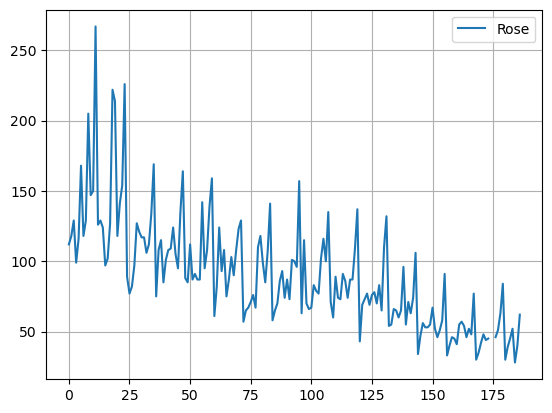

In [7]:
df_rose.plot();
plt.grid()

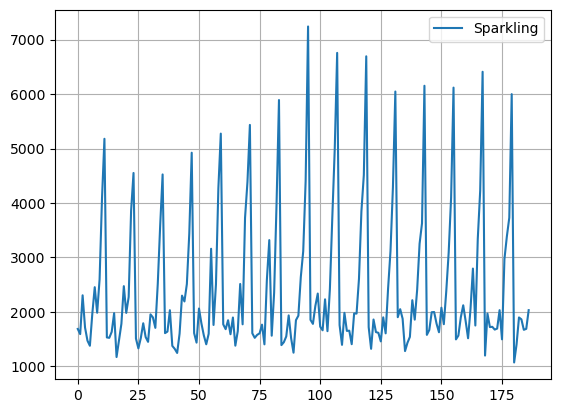

In [8]:
df_spark.plot();
plt.grid()

In [10]:
print(df_rose.describe().round(2))
print("\n",df_spark.describe().round(2))

         Rose
count  185.00
mean    90.39
std     39.18
min     28.00
25%     63.00
50%     86.00
75%    112.00
max    267.00

        Sparkling
count     187.00
mean     2402.42
std      1295.11
min      1070.00
25%      1605.00
50%      1874.00
75%      2549.00
max      7242.00


In [11]:
print("Null values in Rose : \n",df_rose.isnull().sum())
print("\n")
print("Null values in Sparkling : \n",df_spark.isnull().sum())

Null values in Rose : 
 YearMonth    0
Rose         2
dtype: int64


Null values in Sparkling : 
 YearMonth    0
Sparkling    0
dtype: int64


In [4]:
df_rose['Rose'].fillna(df_rose['Rose'].median(),inplace=True)

In [13]:
print("Null values in Rose : \n",df_rose.isnull().sum())
print("\n")
print("Null values in Sparkling : \n",df_spark.isnull().sum())

Null values in Rose : 
 YearMonth    0
Rose         0
dtype: int64


Null values in Sparkling : 
 YearMonth    0
Sparkling    0
dtype: int64


In [14]:
print(df_rose.info())
print("\n")
print(df_spark.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  187 non-null    object 
 1   Rose       187 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.1+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YearMonth  187 non-null    object
 1   Sparkling  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.1+ KB
None


In [5]:
date_rose = pd.date_range(start='1/1/1980', end='8/1/1995', freq='ME')
df_rose['Time_Stamp'] = pd.DataFrame(date_rose,columns=['Month'])
print(df_rose.head())

  YearMonth   Rose Time_Stamp
0   1980-01  112.0 1980-01-31
1   1980-02  118.0 1980-02-29
2   1980-03  129.0 1980-03-31
3   1980-04   99.0 1980-04-30
4   1980-05  116.0 1980-05-31


In [6]:
date_spark = pd.date_range(start='1/1/1980', end='8/1/1995', freq='ME')
df_spark['Time_Stamp'] = pd.DataFrame(date_spark,columns=['Month'])
print(df_spark.head())

  YearMonth  Sparkling Time_Stamp
0   1980-01       1686 1980-01-31
1   1980-02       1591 1980-02-29
2   1980-03       2304 1980-03-31
3   1980-04       1712 1980-04-30
4   1980-05       1471 1980-05-31


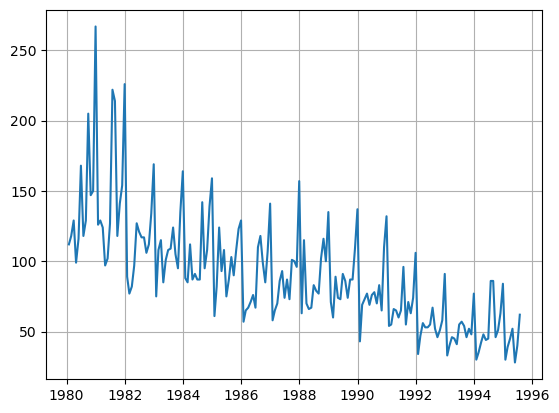

In [6]:
plt.plot(df_rose['Time_Stamp'],df_rose['Rose']);
plt.grid()

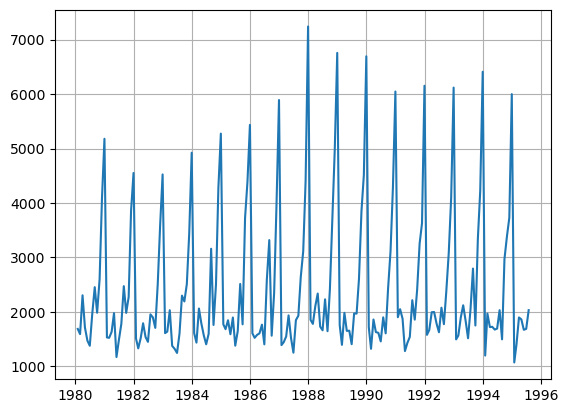

In [8]:
plt.plot(df_spark['Time_Stamp'],df_spark['Sparkling']);
plt.grid()

#### Yearly Production of Rose & Sparkling Wine

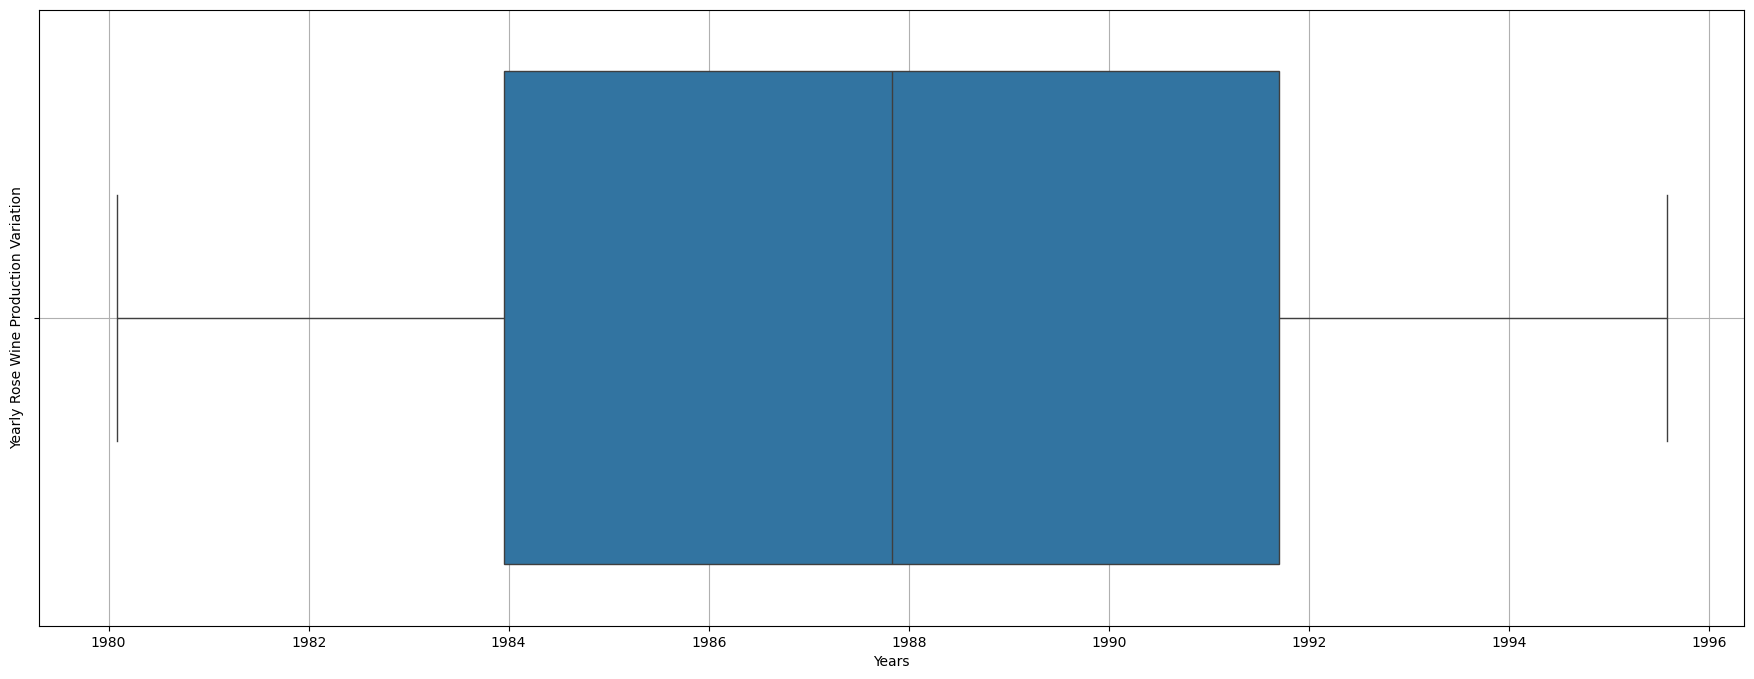

In [20]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x='Time_Stamp', data=df_rose, ax=ax,whis=3)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Rose Wine Production Variation');

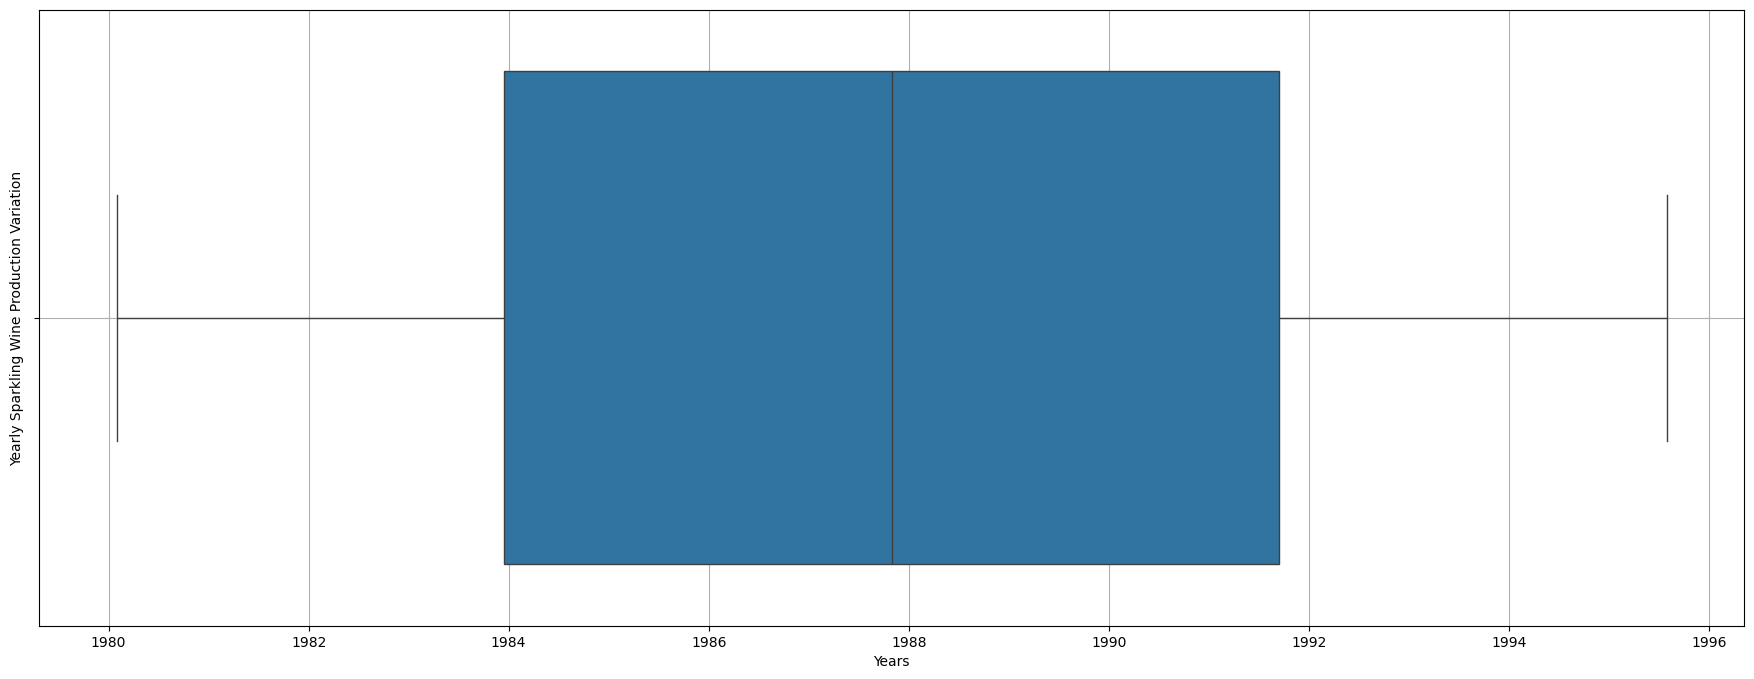

In [24]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x='Time_Stamp', data=df_spark, ax=ax,whis=3)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Sparkling Wine Production Variation');

In [7]:
# Convert the 'YearMonth' column to a datetime format
df_rose['YearMonth'] = pd.to_datetime(df_rose['YearMonth'], format='%Y-%m')

# Extract the year from the 'YearMonth' column
df_rose['Year'] = df_rose['YearMonth'].dt.year

# Display the first few rows to verify the changes
df_rose.head()

,YearMonth,Rose,Time_Stamp,Year
0,1980-01-01,112.0,1980-01-31,1980
1,1980-02-01,118.0,1980-02-29,1980
2,1980-03-01,129.0,1980-03-31,1980
3,1980-04-01,99.0,1980-04-30,1980
4,1980-05-01,116.0,1980-05-31,1980


In [8]:
# Convert the 'YearMonth' column to a datetime format
df_spark['YearMonth'] = pd.to_datetime(df_spark['YearMonth'], format='%Y-%m')

# Extract the year from the 'YearMonth' column
df_spark['Year'] = df_spark['YearMonth'].dt.year

# Display the first few rows to verify the changes
df_spark.head()

,YearMonth,Sparkling,Time_Stamp,Year
0,1980-01-01,1686,1980-01-31,1980
1,1980-02-01,1591,1980-02-29,1980
2,1980-03-01,2304,1980-03-31,1980
3,1980-04-01,1712,1980-04-30,1980
4,1980-05-01,1471,1980-05-31,1980


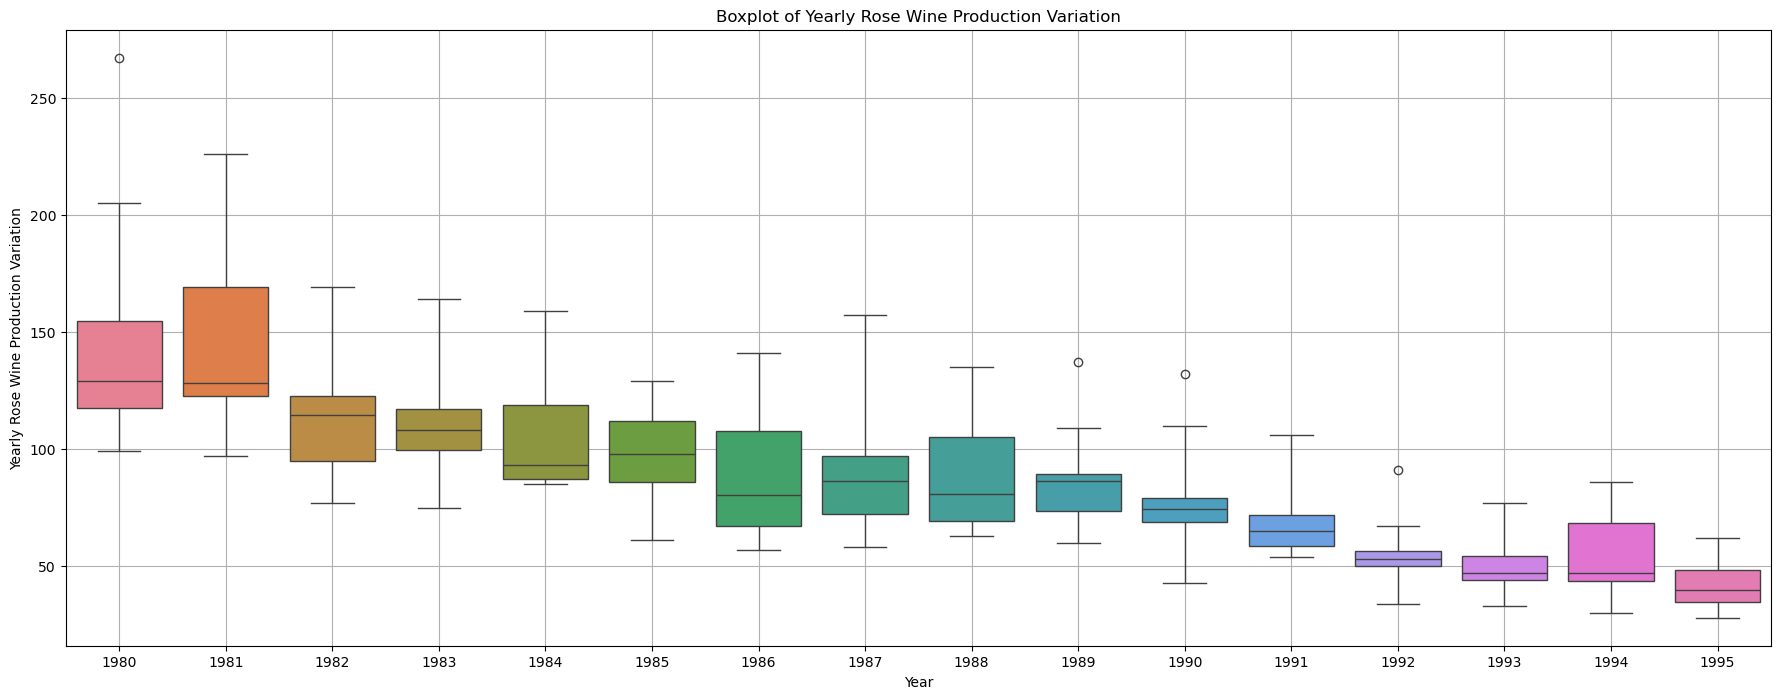

In [9]:
# Create a boxplot showing the variation in yearly rosé wine production
fig, ax = plt.subplots(figsize=(22, 8))
sns.boxplot(x=df_rose['Year'], y=df_rose['Rose'], ax=ax, whis=3,palette='husl')

# Add grid and labels
plt.grid(True)
plt.xlabel("Year")
plt.ylabel("Yearly Rose Wine Production Variation")
plt.title("Boxplot of Yearly Rose Wine Production Variation")

# Show the plot
plt.show()

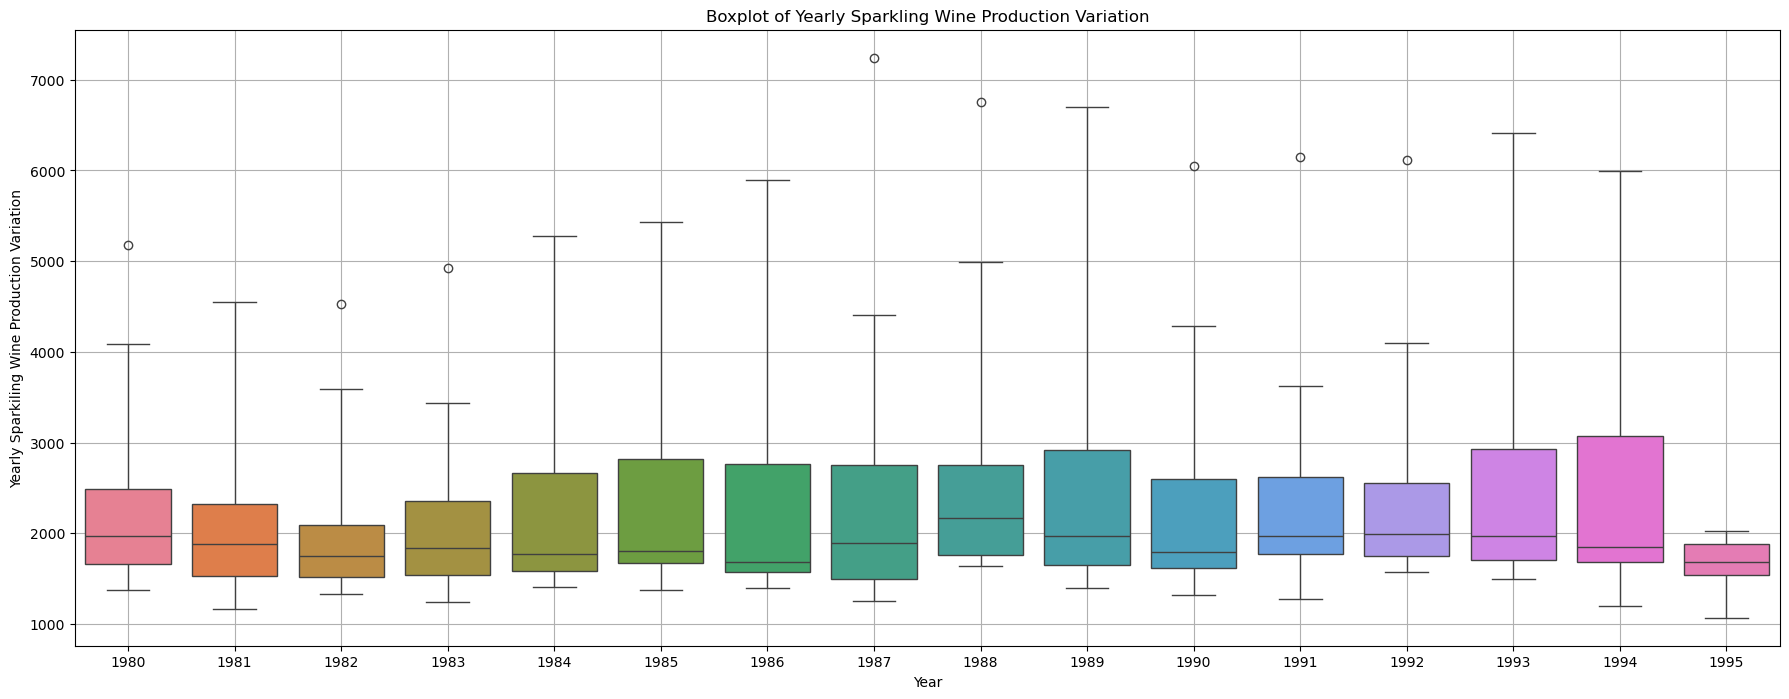

In [10]:
# Create a boxplot showing the variation in yearly rosé wine production
fig, ax = plt.subplots(figsize=(22, 8))
sns.boxplot(x=df_spark['Year'], y=df_spark['Sparkling'], ax=ax, whis=3,palette='husl')

# Add grid and labels
plt.grid(True)
plt.xlabel("Year")
plt.ylabel("Yearly Sparkiling Wine Production Variation")
plt.title("Boxplot of Yearly Sparkling Wine Production Variation")

# Show the plot
plt.show()

#### Monthy Production of Rose & Sparkling Wine

In [9]:
# Convert the 'YearMonth' column to a datetime format
df_rose['YearMonth'] = pd.to_datetime(df_rose['YearMonth'], format='%Y-%m')

# Extract the month from the 'YearMonth' column
df_rose['Month'] = df_rose['YearMonth'].dt.month_name()

# Display the first few rows to verify the changes
df_rose.head()

,YearMonth,Rose,Time_Stamp,Year,Month
0,1980-01-01,112.0,1980-01-31,1980,January
1,1980-02-01,118.0,1980-02-29,1980,February
2,1980-03-01,129.0,1980-03-31,1980,March
3,1980-04-01,99.0,1980-04-30,1980,April
4,1980-05-01,116.0,1980-05-31,1980,May


In [10]:
# Convert the 'YearMonth' column to a datetime format
df_spark['YearMonth'] = pd.to_datetime(df_spark['YearMonth'], format='%Y-%m')

# Extract the month from the 'YearMonth' column
df_spark['Month'] = df_spark['YearMonth'].dt.month_name()

# Display the first few rows to verify the changes
df_spark.head()

,YearMonth,Sparkling,Time_Stamp,Year,Month
0,1980-01-01,1686,1980-01-31,1980,January
1,1980-02-01,1591,1980-02-29,1980,February
2,1980-03-01,2304,1980-03-31,1980,March
3,1980-04-01,1712,1980-04-30,1980,April
4,1980-05-01,1471,1980-05-31,1980,May


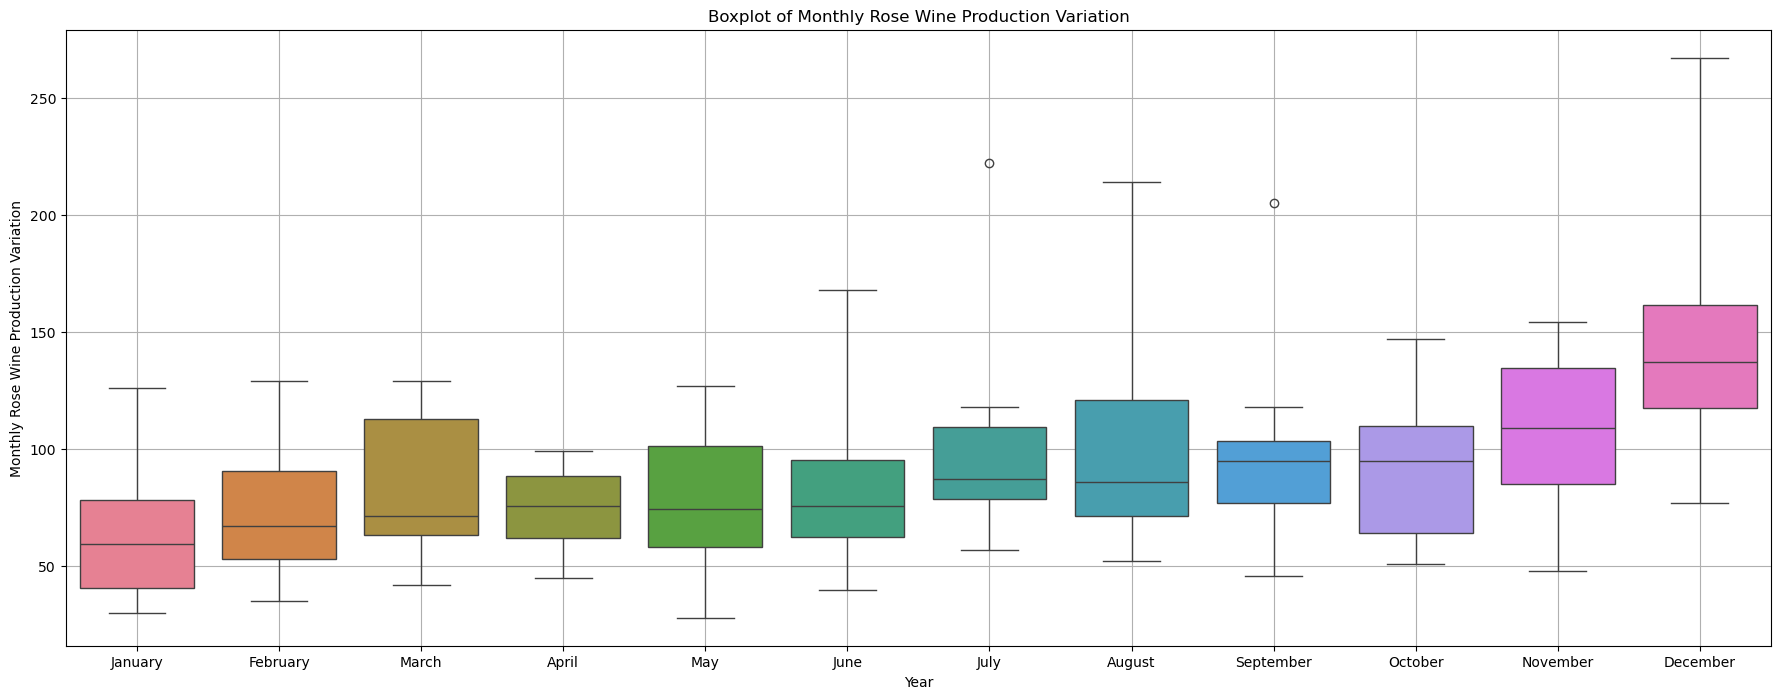

In [12]:
# Create a boxplot showing the variation in yearly rosé wine production
fig, ax = plt.subplots(figsize=(22, 8))
sns.boxplot(x=df_rose['Month'], y=df_rose['Rose'], ax=ax, whis=3,palette='husl')

# Add grid and labels
plt.grid(True)
plt.xlabel("Year")
plt.ylabel("Monthly Rose Wine Production Variation")
plt.title("Boxplot of Monthly Rose Wine Production Variation")

# Show the plot
plt.show()

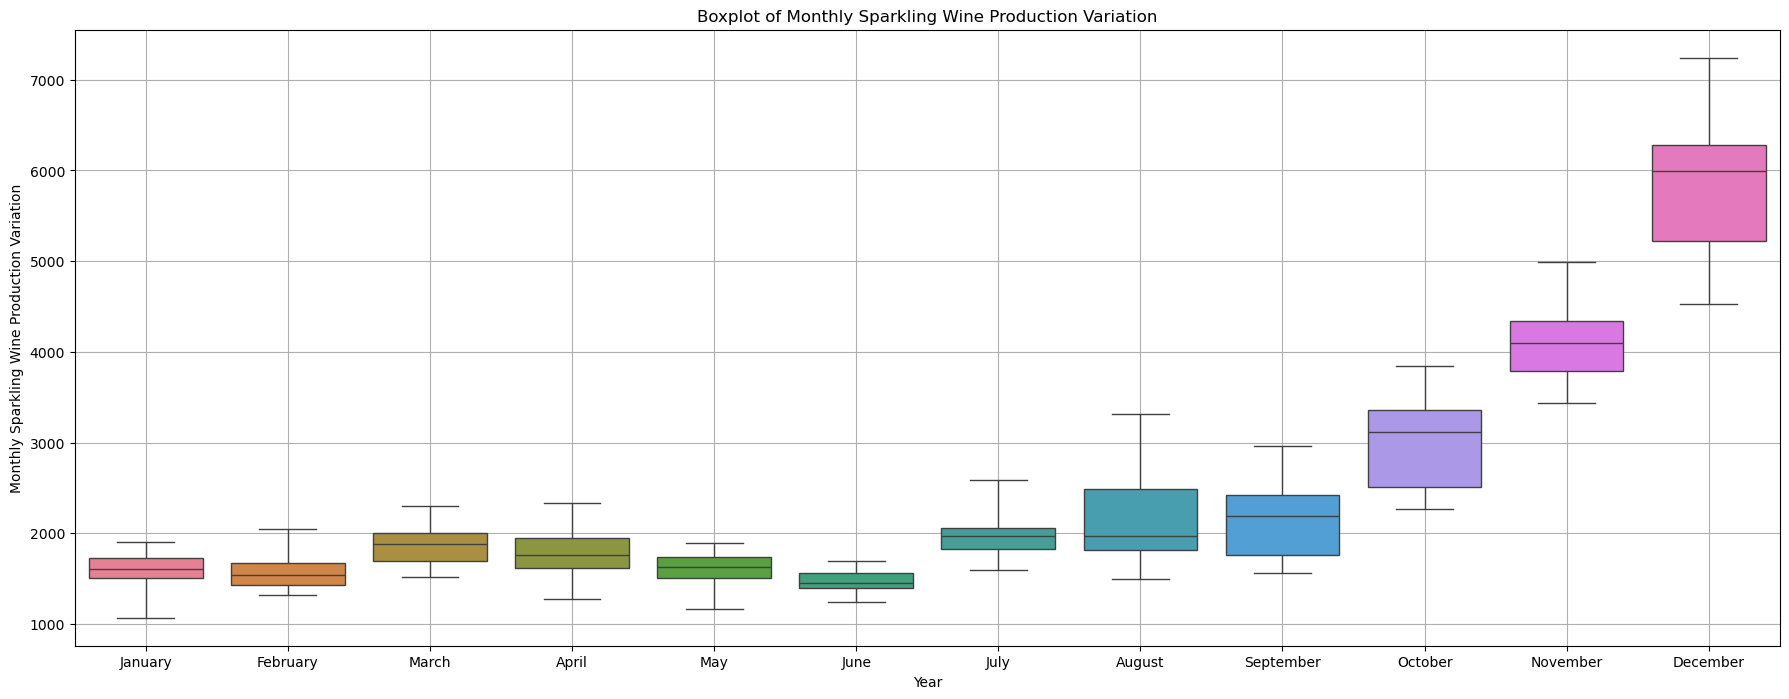

In [13]:
# Create a boxplot showing the variation in yearly rosé wine production
fig, ax = plt.subplots(figsize=(22, 8))
sns.boxplot(x=df_spark['Month'], y=df_spark['Sparkling'], ax=ax, whis=3,palette='husl')

# Add grid and labels
plt.grid(True)
plt.xlabel("Year")
plt.ylabel("Monthly Sparkling Wine Production Variation")
plt.title("Boxplot of Monthly Sparkling Wine Production Variation")

# Show the plot
plt.show()

#### Monthly sales across Years for Rose & Sparkling Wine

In [15]:
yearly_sales_months_rose = pd.pivot_table(df_rose, values = 'Rose', columns = 'Month', index = 'Year')
yearly_sales_months_rose

Month,April,August,December,February,January,July,June,March,May,November,October,September
Year,,,,,,,,,,,,
1980,99.0,129.0,267.0,118.0,112.0,118.0,168.0,129.0,116.0,150.0,147.0,205.0
1981,97.0,214.0,226.0,129.0,126.0,222.0,127.0,124.0,102.0,154.0,141.0,118.0
1982,97.0,117.0,169.0,77.0,89.0,117.0,121.0,82.0,127.0,134.0,112.0,106.0
1983,85.0,124.0,164.0,108.0,75.0,109.0,108.0,115.0,101.0,135.0,95.0,105.0
1984,87.0,142.0,159.0,85.0,88.0,87.0,87.0,112.0,91.0,139.0,108.0,95.0
1985,93.0,103.0,129.0,82.0,61.0,87.0,75.0,124.0,108.0,123.0,108.0,90.0
1986,71.0,118.0,141.0,65.0,57.0,110.0,67.0,67.0,76.0,107.0,85.0,99.0
1987,86.0,73.0,157.0,65.0,58.0,87.0,74.0,70.0,93.0,96.0,100.0,101.0
1988,66.0,77.0,135.0,115.0,63.0,79.0,83.0,70.0,67.0,100.0,116.0,102.0


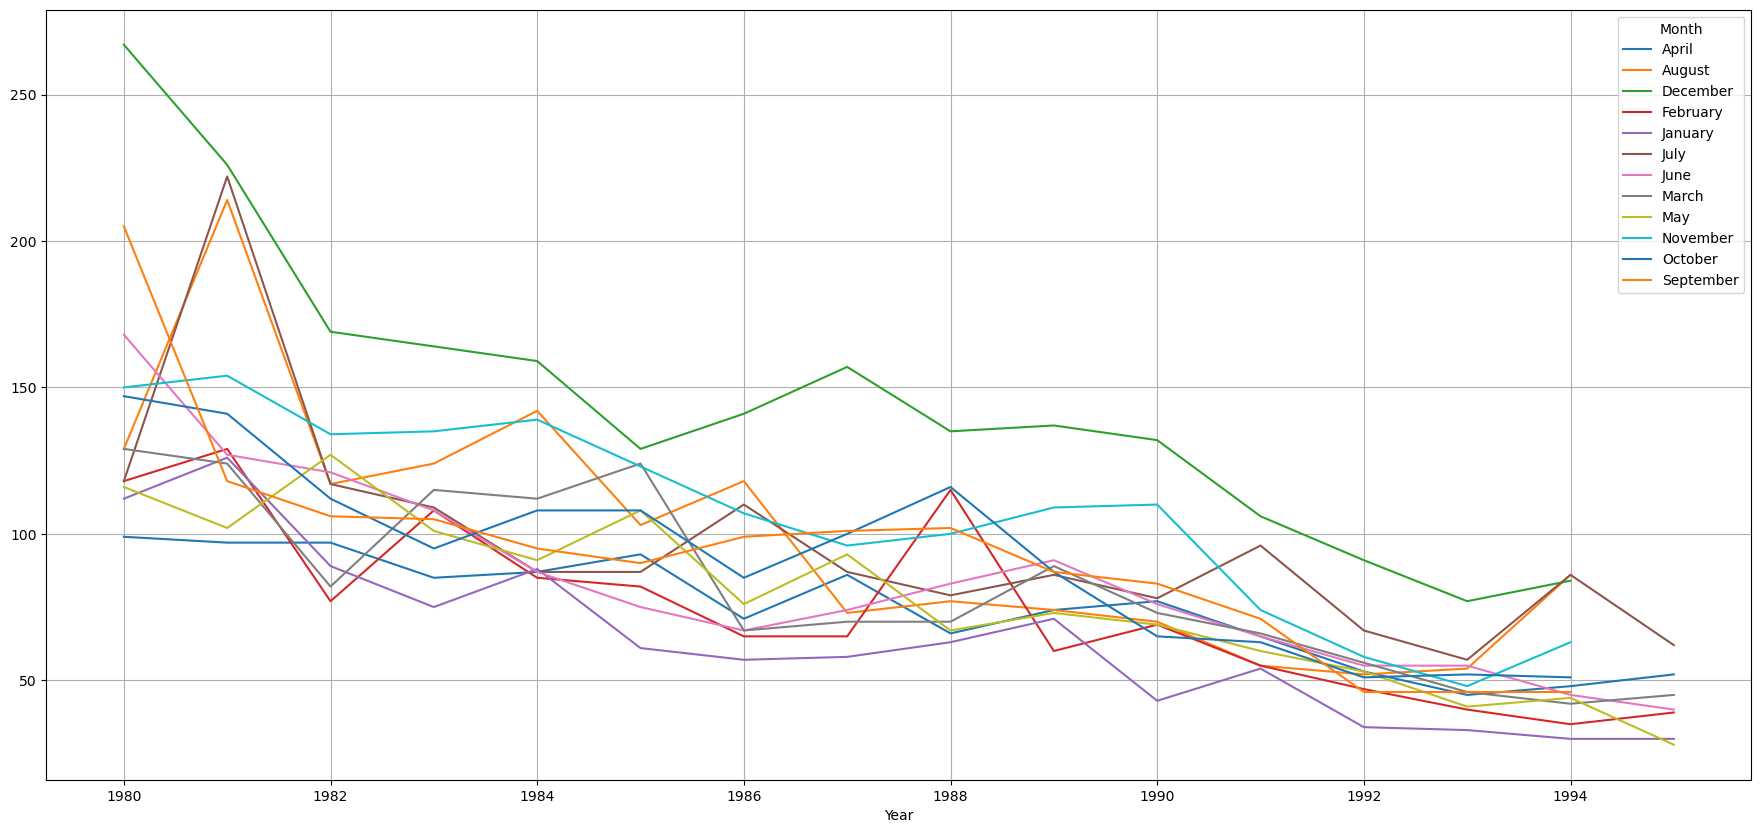

In [15]:
fig, ax = plt.subplots(figsize=(22,10))
yearly_sales_months_rose.plot(ax=ax)
plt.grid();

In [16]:
yearly_sales_months_spark = pd.pivot_table(df_spark, values = 'Sparkling', columns = 'Month', index = 'Year')
yearly_sales_months_spark

Month,April,August,December,February,January,July,June,March,May,November,October,September
Year,,,,,,,,,,,,
1980,1712.0,2453.0,5179.0,1591.0,1686.0,1966.0,1377.0,2304.0,1471.0,4087.0,2596.0,1984.0
1981,1976.0,2472.0,4551.0,1523.0,1530.0,1781.0,1480.0,1633.0,1170.0,3857.0,2273.0,1981.0
1982,1790.0,1897.0,4524.0,1329.0,1510.0,1954.0,1449.0,1518.0,1537.0,3593.0,2514.0,1706.0
1983,1375.0,2298.0,4923.0,1638.0,1609.0,1600.0,1245.0,2030.0,1320.0,3440.0,2511.0,2191.0
1984,1789.0,3159.0,5274.0,1435.0,1609.0,1597.0,1404.0,2061.0,1567.0,4273.0,2504.0,1759.0
1985,1589.0,2512.0,5434.0,1682.0,1771.0,1645.0,1379.0,1846.0,1896.0,4388.0,3727.0,1771.0
1986,1605.0,3318.0,5891.0,1523.0,1606.0,2584.0,1403.0,1577.0,1765.0,3987.0,2349.0,1562.0
1987,1935.0,1930.0,7242.0,1442.0,1389.0,1847.0,1250.0,1548.0,1518.0,4405.0,3114.0,2638.0
1988,2336.0,1645.0,6757.0,1779.0,1853.0,2230.0,1661.0,2108.0,1728.0,4988.0,3740.0,2421.0


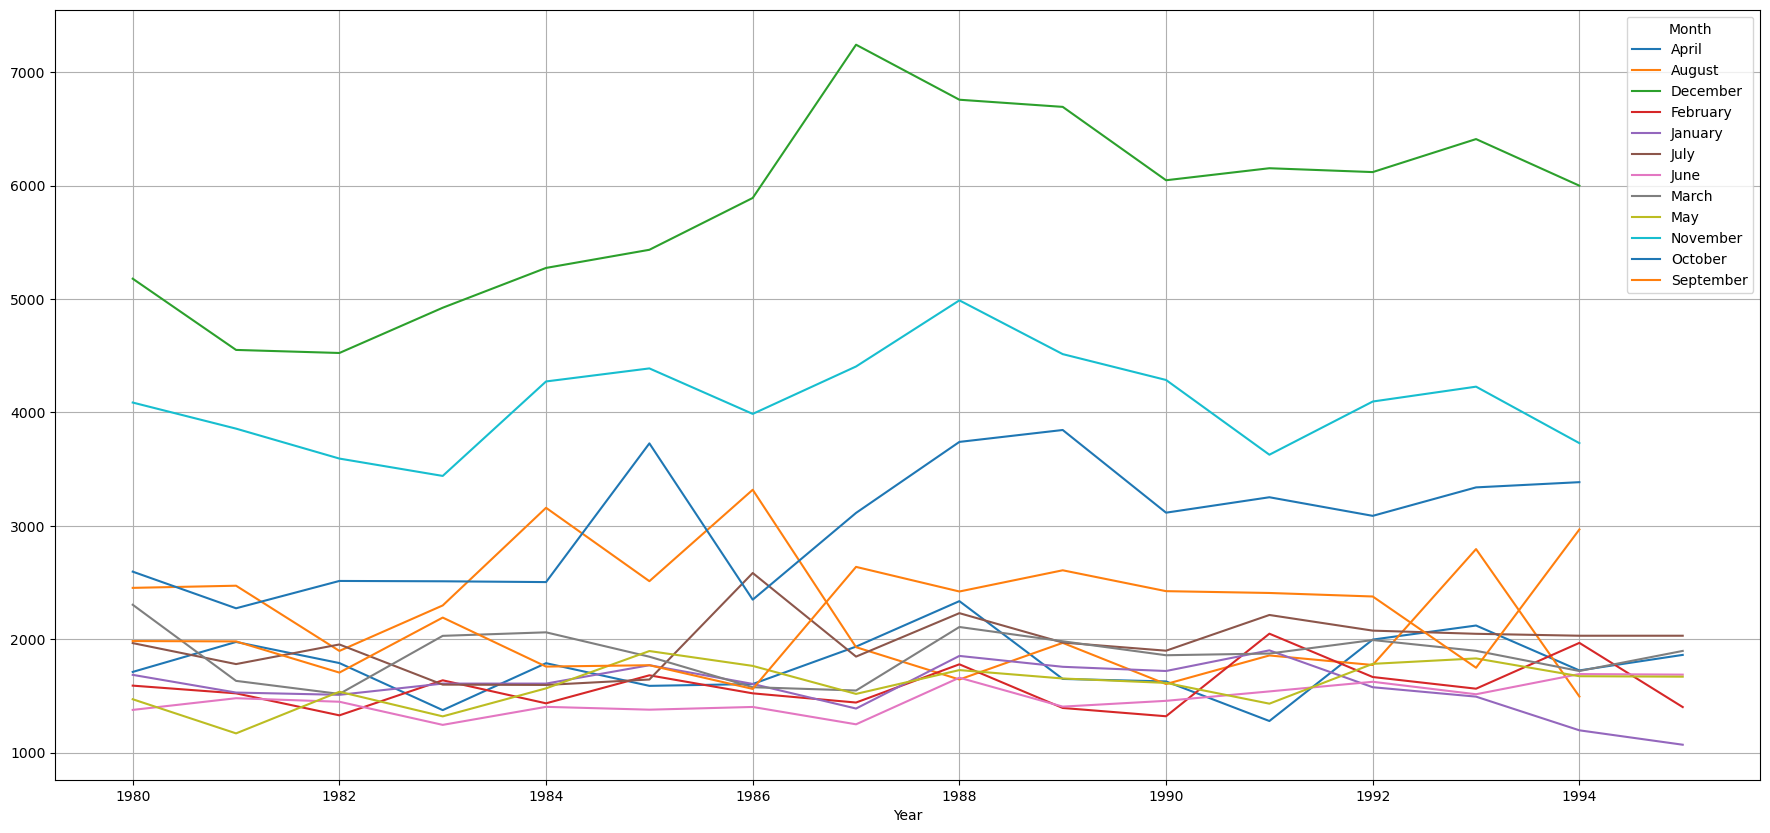

In [17]:
fig, ax = plt.subplots(figsize=(22,10))
yearly_sales_months_spark.plot(ax=ax)
plt.grid();

##### Yearly sum of observations

In [18]:
df_yearly_sum_rose = pd.pivot_table(df_rose, values = 'Rose', index = 'Year', aggfunc='sum').round(2)
df_yearly_sum_rose.head()

,Rose
Year,
1980,1758.0
1981,1780.0
1982,1348.0
1983,1324.0
1984,1280.0


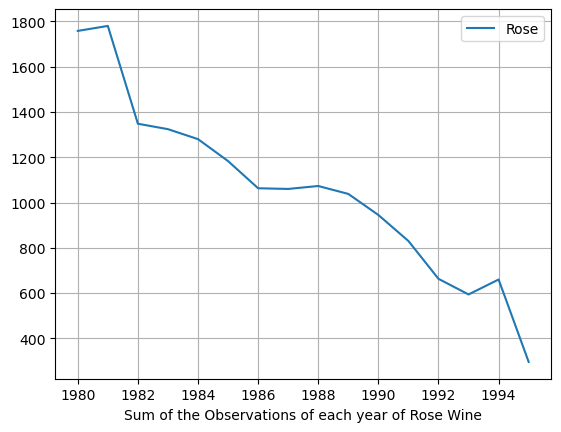

In [19]:
df_yearly_sum_rose.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year of Rose Wine');

In [20]:
df_yearly_sum_spark = pd.pivot_table(df_spark, values = 'Sparkling', index = 'Year', aggfunc='sum').round(2)
df_yearly_sum_spark.head()

,Sparkling
Year,
1980,28406
1981,26227
1982,25321
1983,26180
1984,28431


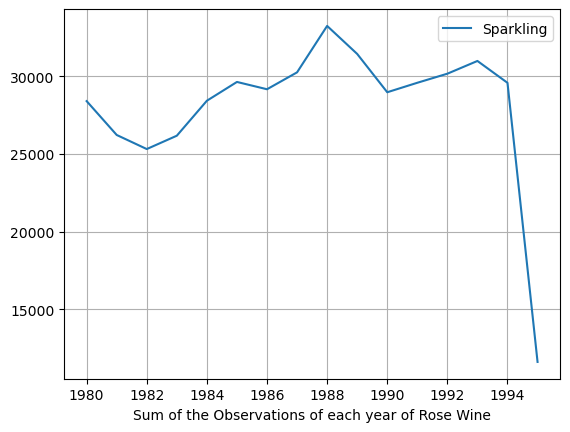

In [33]:
df_yearly_sum_spark.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year of Rose Wine');

##### Mean of Observations of each Year

In [21]:
df_yearly_mean_rose = pd.pivot_table(df_rose, values = 'Rose', index = 'Year', aggfunc='mean').round(2)
df_yearly_mean_rose.head()

,Rose
Year,
1980,146.50
1981,148.33
1982,112.33
1983,110.33
1984,106.67


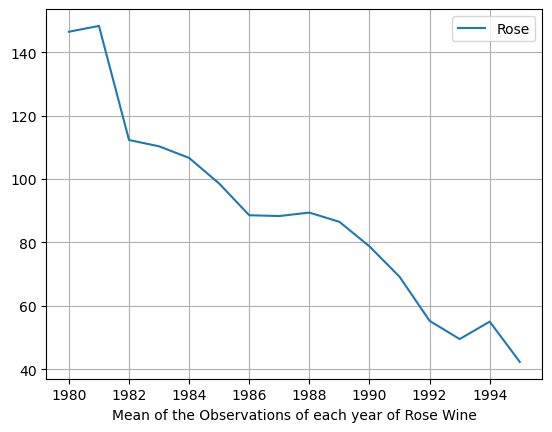

In [17]:
df_yearly_mean_rose.plot();
plt.grid()
plt.xlabel('Mean of the Observations of each year of Rose Wine');

In [22]:
df_yearly_mean_spark = pd.pivot_table(df_spark, values = 'Sparkling', index = 'Year', aggfunc='mean').round(2)
df_yearly_mean_spark.head()

,Sparkling
Year,
1980,2367.17
1981,2185.58
1982,2110.08
1983,2181.67
1984,2369.25


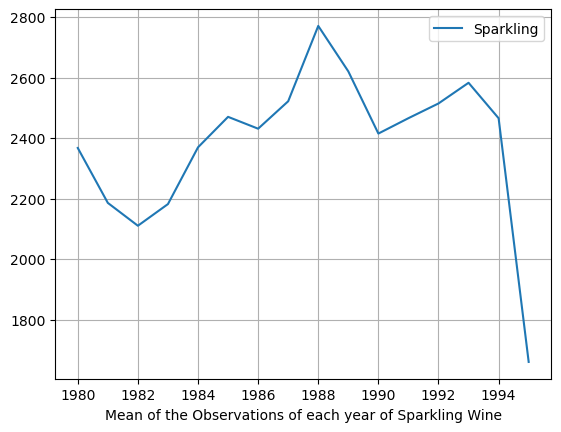

In [20]:
df_yearly_mean_spark.plot();
plt.grid()
plt.xlabel('Mean of the Observations of each year of Sparkling Wine');

##### Sum of Observations of each Quarter

In [23]:
# calculate sum of sales, grouped by quarter
quarterly_sum_rose = df_rose.groupby(df_rose['Time_Stamp'].dt.to_period('Q'),as_index='Time_Stamp')['Rose'].sum()
quarterly_sum_rose.head()

Time_Stamp
1980Q1    359.0
1980Q2    383.0
1980Q3    452.0
1980Q4    564.0
1981Q1    379.0
Freq: Q-DEC, Name: Rose, dtype: float64

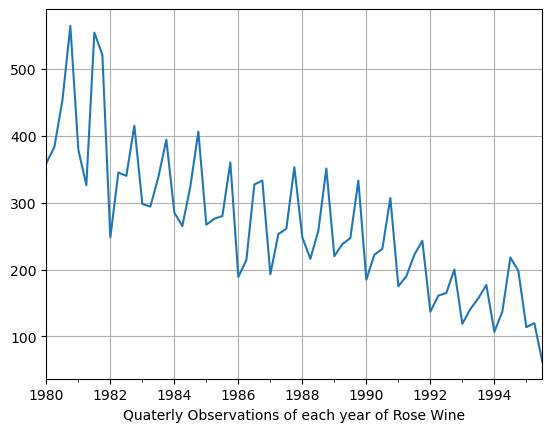

In [84]:
quarterly_sum_rose.plot();
plt.grid()
plt.xlabel('Quaterly Observations of each year of Rose Wine');

In [24]:
# calculate sum of sales, grouped by quarter
quarterly_sum_spark = df_spark.groupby(df_spark['Time_Stamp'].dt.to_period('Q'),as_index='Time_Stamp')['Sparkling'].sum()
quarterly_sum_spark.head()

Time_Stamp
1980Q1     5581
1980Q2     4560
1980Q3     6403
1980Q4    11862
1981Q1     4686
Freq: Q-DEC, Name: Sparkling, dtype: int64

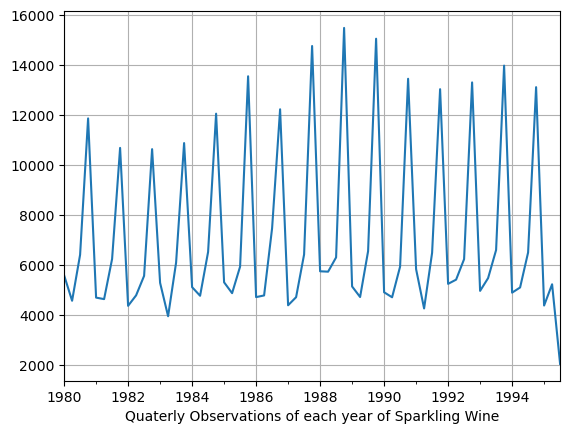

In [87]:
quarterly_sum_spark.plot();
plt.grid()
plt.xlabel('Quaterly Observations of each year of Sparkling Wine');

#### Decomposition

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [35]:
df_spark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   YearMonth   187 non-null    object        
 1   Sparkling   187 non-null    int64         
 2   Time_Stamp  187 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 4.5+ KB


##### Additive Model

In [34]:
df_rose.index = pd.to_datetime(df_rose.index, format='%Y-%m')

In [31]:
# Check if 'Rose' contains any non-numeric values, and ensure it is numeric
df_rose['Rose'] = pd.to_numeric(df_rose['Rose'], errors='coerce')

# Drop rows where 'Rose' is NaN (these are the non-numeric or missing values)
df_rose.dropna(subset=['Rose'], inplace=True)

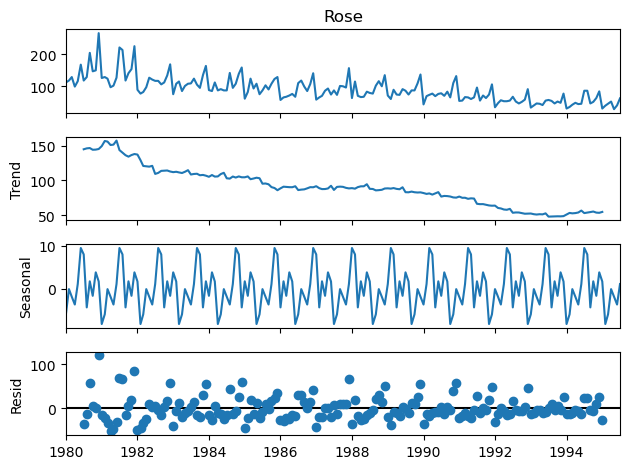

In [51]:
# Perform additive decomposition on the numeric 'Rose' column
decomposition_rose = seasonal_decompose(df_rose['Rose'], model='additive', period=13)

# Plot the decomposition results
decomposition_rose.plot()
plt.show()

In [37]:
# Ensure 'YearMonth' is properly parsed as a DatetimeIndex
df_spark['YearMonth'] = pd.to_datetime(df_spark['YearMonth'], format='%Y-%m')
df_spark.set_index('YearMonth', inplace=True)

In [38]:
# Check if 'Sparkling' contains any non-numeric values, and ensure it is numeric
df_spark['Sparkling'] = pd.to_numeric(df_spark['Sparkling'], errors='coerce')

# Drop rows where 'Sparkling' is NaN (these are the non-numeric or missing values)
df_spark.dropna(subset=['Sparkling'], inplace=True)


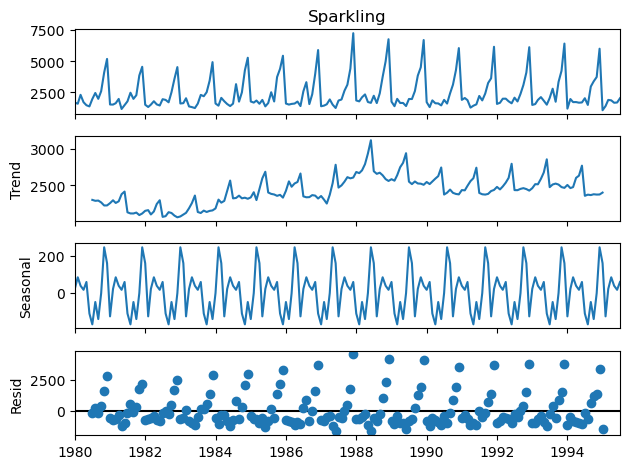

In [52]:
# Perform additive decomposition on the numeric 'Sparkling' column
decomposition_spark = seasonal_decompose(df_spark['Sparkling'], model='additive', period=13)

# Plot the decomposition results
decomposition_spark.plot();

##### Multiplicative Model

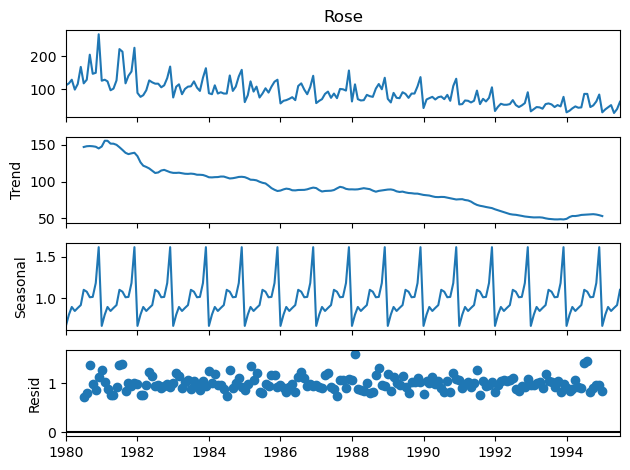

In [53]:
# Perform multiplicative decomposition on the numeric 'Rose' column
decomposition_rose = seasonal_decompose(df_rose['Rose'], model='multiplicative', period=12)

# Plot the decomposition results
decomposition_rose.plot()
plt.show()

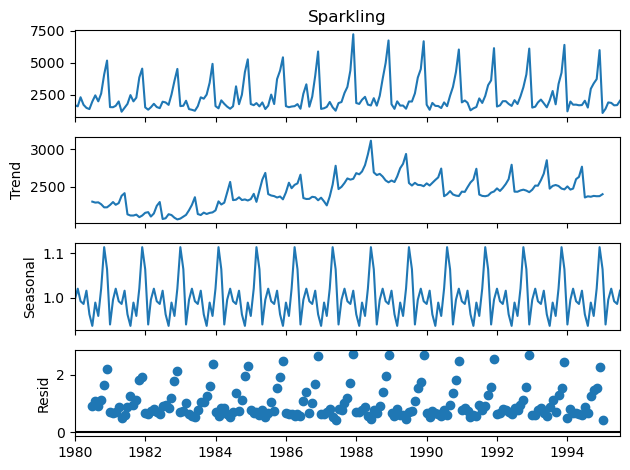

In [54]:
# Perform multiplicative decomposition on the numeric 'Sparkling' column
decomposition_spark = seasonal_decompose(df_spark['Sparkling'], model='multiplicative', period=13)

# Plot the decomposition results
decomposition_spark.plot();

#### Data Pre-Processing

In [55]:
# Split train set consisting rose wine data until 1990 and test set from 1991 onwards

train_rose = df_rose[df_rose.index.year < 1991]
test_rose = df_rose[df_rose.index.year >= 1991]

In [56]:
# Split train set consisting sparkling wine data until 1990 and test set from 1991 onwards

train_spark = df_spark[df_spark.index.year < 1991]
test_spark = df_spark[df_spark.index.year >= 1991]

In [65]:
# Printing train and test data sets of rose wine

print('Head of Rose Training Data')
display(train_rose.head())

print('Tail of Rose Training Data')
display(train_rose.tail())

print('Head of Rose Testing Data')
display(test_rose.head())

print('Tail of Rose Testing Data')
display(test_rose.tail())

Head of Rose Training Data


,Rose,Time_Stamp
YearMonth,,
1980-01-01,112.0,1980-01-31
1980-02-01,118.0,1980-02-29
1980-03-01,129.0,1980-03-31
1980-04-01,99.0,1980-04-30
1980-05-01,116.0,1980-05-31


Tail of Rose Training Data


,Rose,Time_Stamp
YearMonth,,
1990-08-01,70.0,1990-08-31
1990-09-01,83.0,1990-09-30
1990-10-01,65.0,1990-10-31
1990-11-01,110.0,1990-11-30
1990-12-01,132.0,1990-12-31


Head of Rose Testing Data


,Rose,Time_Stamp
YearMonth,,
1991-01-01,54.0,1991-01-31
1991-02-01,55.0,1991-02-28
1991-03-01,66.0,1991-03-31
1991-04-01,65.0,1991-04-30
1991-05-01,60.0,1991-05-31


Tail of Rose Testing Data


,Rose,Time_Stamp
YearMonth,,
1995-03-01,45.0,1995-03-31
1995-04-01,52.0,1995-04-30
1995-05-01,28.0,1995-05-31
1995-06-01,40.0,1995-06-30
1995-07-01,62.0,1995-07-31


In [62]:
# Shape of train and test data set of rose wine

print("Shape of Train Rose wine dataset :", train_rose.shape)
print("Shape of Test Rose wine dataset :", test_rose.shape)

Shape of Train Rose wine dataset : (132, 2)
Shape of Test Rose wine dataset : (55, 2)


In [66]:
# Printing train and test data sets of sparkling wine

print('Head of Sparkling Training Data')
display(train_spark.head())

print('tail of Sparkling Training Data')
display(train_spark.tail())

print('Head of Sparkling Testing Data')
display(test_spark.head())

print('Tail of Sparkling Testing Data')
display(test_spark.tail())

Head of Sparkling Training Data


,Sparkling,Time_Stamp
YearMonth,,
1980-01-01,1686,1980-01-31
1980-02-01,1591,1980-02-29
1980-03-01,2304,1980-03-31
1980-04-01,1712,1980-04-30
1980-05-01,1471,1980-05-31


tail of Sparkling Training Data


,Sparkling,Time_Stamp
YearMonth,,
1990-08-01,1605,1990-08-31
1990-09-01,2424,1990-09-30
1990-10-01,3116,1990-10-31
1990-11-01,4286,1990-11-30
1990-12-01,6047,1990-12-31


Head of Sparkling Testing Data


,Sparkling,Time_Stamp
YearMonth,,
1991-01-01,1902,1991-01-31
1991-02-01,2049,1991-02-28
1991-03-01,1874,1991-03-31
1991-04-01,1279,1991-04-30
1991-05-01,1432,1991-05-31


Tail of Sparkling Testing Data


,Sparkling,Time_Stamp
YearMonth,,
1995-03-01,1897,1995-03-31
1995-04-01,1862,1995-04-30
1995-05-01,1670,1995-05-31
1995-06-01,1688,1995-06-30
1995-07-01,2031,1995-07-31


In [63]:
# Shape of train and test data set of sparkling wine

print("Shape of Train Sparkling wine dataset :", train_spark.shape)
print("Shape of Test Sparkling wine dataset :", test_spark.shape)

Shape of Train Sparkling wine dataset : (132, 2)
Shape of Test Sparkling wine dataset : (55, 2)


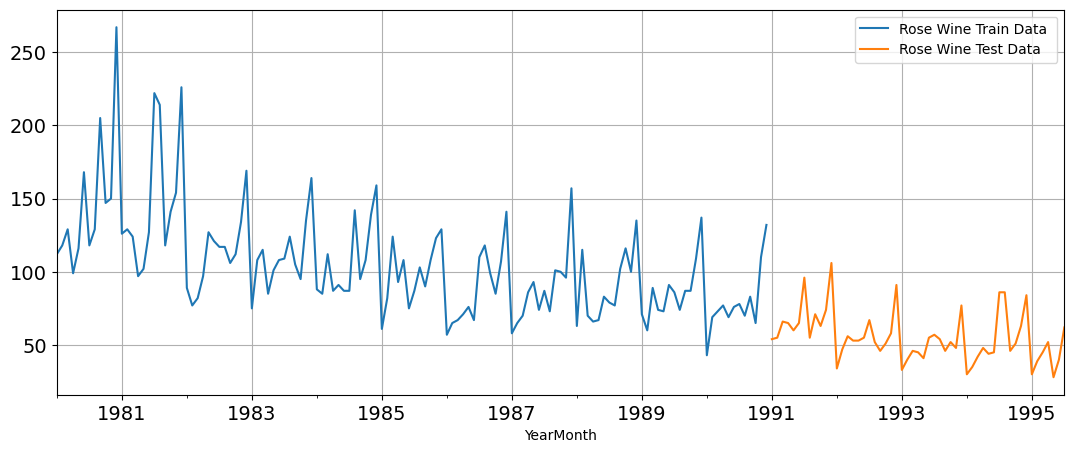

In [69]:
train_rose['Rose'].plot(figsize=(13,5), fontsize=14)
test_rose['Rose'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Rose Wine Train Data ','Rose Wine Test Data '])
plt.show()

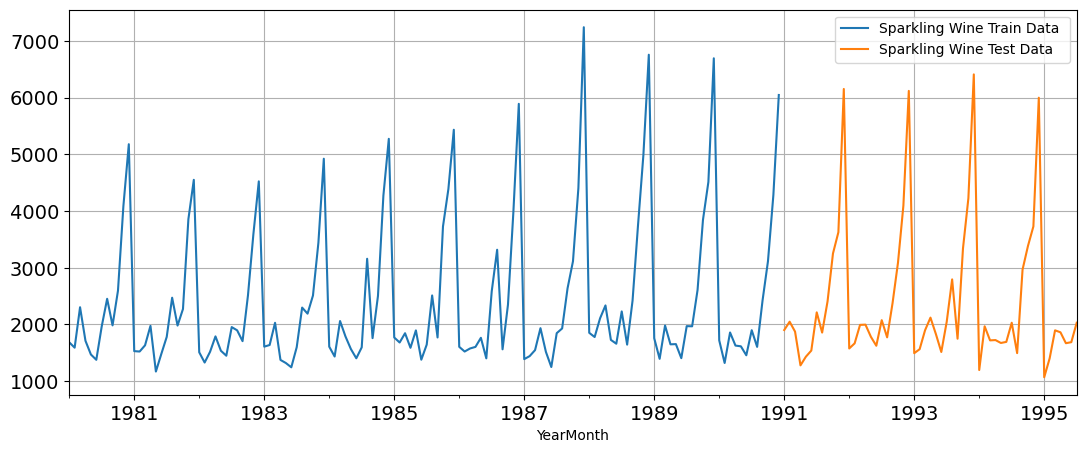

In [70]:
train_spark['Sparkling'].plot(figsize=(13,5), fontsize=14)
test_spark['Sparkling'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Sparkling Wine Train Data ','Sparkling Wine Test Data '])
plt.show()

### Model Building

#### 1. Linear Regression

In [71]:
from sklearn.linear_model import LinearRegression

In [74]:
train_time_rose = [i+1 for i in range(len(train_rose))]
test_time_rose = [i+len(train_rose) for i in range(len(test_rose))]
print('Training Time instance of Rose wine','\n',train_time_rose)
print('Test Time instance of Rose wine','\n',test_time_rose)

Training Time instance of Rose wine 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance of Rose wine 
 [132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186]


In [75]:
train_time_spark = [i+1 for i in range(len(train_spark))]
test_time_spark = [i+len(train_spark) for i in range(len(test_spark))]
print('Training Time instance of Sparkling wine','\n',train_time_spark)
print('Test Time instance of Sparkling wine','\n',test_time_spark)

Training Time instance of Sparkling wine 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance of Sparkling wine 
 [132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186]
